In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
np.random.seed(500)

In [ ]:
Corpus = pd.read_csv(r"/content/drive/MyDrive/text classifier/Reviews.csv",encoding='latin-1')

The dataset was taken from https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. It is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its has nine supportive features from which we used the Recommended IND and Rating.

**Exploratory Data Analysis**

In [ ]:
print(Corpus.shape)

(23486, 11)


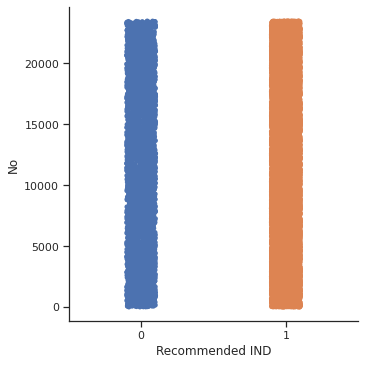

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Recommended IND", y="No", data=Corpus)

The Dataset is plotted using a Bar Graph with X axis consisting is the 'Recommended IND' and Y axis having 'No' (of reviews in the dataset). As one can observe, the dataset has equal numbers of reviews both types of categories, so it is ideal for our purpose.

**Data Preprocessing**

In [ ]:
Corpus['Review Text'].dropna(inplace=True)   #step a

Removing all None Values

In [ ]:
Corpus=Corpus.drop(['Clothing ID','Age','Title','Positive Feedback Count','Division Name','Department Name','Class Name','Rating','No'],axis=1)

Dropping all Columns except Review Text and Recommended IND for our purpose

In [ ]:
print(Corpus)

                                             Review Text  Recommended IND
0      Absolutely wonderful - silky and sexy and comf...                1
1      Love this dress!  it's sooo pretty.  i happene...                1
2      I had such high hopes for this dress and reall...                0
3      I love, love, love this jumpsuit. it's fun, fl...                1
4      This shirt is very flattering to all due to th...                1
...                                                  ...              ...
23481  I was very happy to snag this dress at such a ...                1
23482  It reminds me of maternity clothes. soft, stre...                1
23483  This fit well, but the top was very see throug...                0
23484  I bought this dress for a wedding i have this ...                1
23485  This dress in a lovely platinum is feminine an...                1

[23486 rows x 2 columns]


In [ ]:
Corpus['Review Text'] = [str(entry).lower() for entry in Corpus['Review Text']] 

Corpus['Review Text']= [word_tokenize(str(entry)) for entry in Corpus['Review Text']] 

Taking every word from the 'Review Text' Column and converting it into lower alphabet because it's better suited for training.

Tokenization is a process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens. NLTK Library is used for that and the function word_tokenize is taken from the library to do that.

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)         
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun.

In [ ]:
for index,entry in enumerate(Corpus['Review Text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        #print('word' + word)
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            #print('Word final: '+ str(word_Final))
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'Review_final'] = str(Final_words)

Removed Blank rows in Data,
Changed all the text to lower case,
Word Tokenization,
Removed Stop words,
Removed Non-alpha text,
Did Word Lemmatization

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['Review_final'],Corpus['Recommended IND'],test_size=0.2)

The Dataset is split into Testing and Training Datasets. The split taken 80% training and 20% testing split.

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Transforms Categorical data of string type in the data set into numerical values which the model can understand.

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=6000)
Tfidf_vect.fit(Corpus['Review_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

We use TF-DIF method for word vectorization, it stands for "Term Frequency — Inverse Document”. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word. There will be maximum of 6000 unique words/features as we have set parameter max_features=6000.

In [ ]:
print(Tfidf_vect.vocabulary_)

{'absolutely': 8, 'wonderful': 4909, 'silky': 3853, 'sexy': 3757, 'comfortable': 854, 'love': 2501, 'dress': 1340, 'sooo': 3993, 'pretty': 3265, 'happen': 1960, 'find': 1626, 'store': 4128, 'glad': 1858, 'bc': 324, 'never': 2824, 'would': 4937, 'order': 2946, 'online': 2923, 'petite': 3097, 'buy': 589, 'length': 2402, 'hit': 2036, 'little': 2457, 'knee': 2318, 'definitely': 1147, 'true': 4530, 'midi': 2657, 'someone': 3983, 'truly': 4532, 'high': 2021, 'hope': 2059, 'really': 3405, 'want': 4790, 'work': 4920, 'initially': 2180, 'small': 3931, 'usual': 4710, 'size': 3876, 'fact': 1555, 'could': 977, 'zip': 4994, 'reorder': 3491, 'medium': 2626, 'overall': 2974, 'top': 4462, 'half': 1944, 'fit': 1644, 'nicely': 2833, 'bottom': 476, 'tight': 4426, 'layer': 2371, 'several': 3749, 'somewhat': 3987, 'cheap': 693, 'net': 2820, 'imo': 2131, 'major': 2543, 'design': 1185, 'flaw': 1671, 'sewn': 3755, 'directly': 1243, 'zipper': 4996, 'jumpsuit': 2283, 'fun': 1792, 'flirty': 1684, 'fabulous': 155

In [ ]:
print(Train_X_Tfidf)

  (0, 4932)	0.133924567993478
  (0, 4781)	0.10113387035434288
  (0, 4771)	0.19972202143581577
  (0, 4569)	0.12934268845672395
  (0, 4538)	0.175205791398483
  (0, 3984)	0.1326418185171406
  (0, 3504)	0.17688625757983067
  (0, 3269)	0.11392234240183459
  (0, 3117)	0.11711408684037304
  (0, 3082)	0.084901315666007
  (0, 2897)	0.17141812215460542
  (0, 2759)	0.2221104911056041
  (0, 2478)	0.06323847947693689
  (0, 2469)	0.22113219024318706
  (0, 2455)	0.18697200436480538
  (0, 2441)	0.12260123860892133
  (0, 2090)	0.2781846027303782
  (0, 1914)	0.14485727983369565
  (0, 1857)	0.11441846542406578
  (0, 1644)	0.05759219324122955
  (0, 1567)	0.11115493603144652
  (0, 1478)	0.09955386700636334
  (0, 1403)	0.3259758175591977
  (0, 1314)	0.19972202143581577
  (0, 1065)	0.21926979493184512
  :	:
  (16439, 3969)	0.09474826355178112
  (16439, 3876)	0.06893886868903336
  (16439, 3271)	0.20145988875040297
  (16439, 3173)	0.1716059826496134
  (16439, 3084)	0.12201741236172213
  (16439, 3010)	0.2518484

**Support Vector Machine**

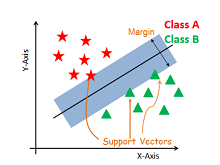

SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

**How does an SVM work?**


The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

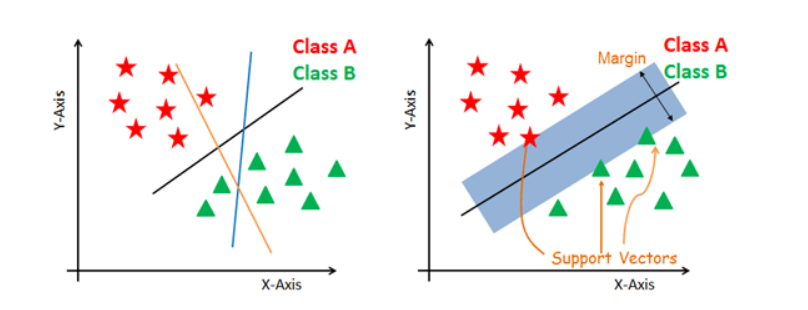

In [ ]:

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  89.00085154697702


Step 1) Fit the training dataset on the classifier

Step 2) Predict the labels on validation dataset

Step 3) Use accuracy_score function to get the accuracy



In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Test_Y,predictions_SVM))
print(classification_report(Test_Y,predictions_SVM))
print(accuracy_score(Test_Y, predictions_SVM))

[[ 732  548]
 [ 227 5539]]
              precision    recall  f1-score   support

           0       0.76      0.57      0.65      1280
           1       0.91      0.96      0.93      5766

    accuracy                           0.89      7046
   macro avg       0.84      0.77      0.79      7046
weighted avg       0.88      0.89      0.88      7046

0.8900085154697701


Confusion Matrix for Support Vector Machine


In [ ]:
with open('/content/drive/MyDrive/text classifier/text_classifier_SVM', 'wb') as picklefile:
    pickle.dump(SVM,picklefile)

Saving the Model as a pickle file

In [ ]:

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

predictions_NB = Naive.predict(Test_X_Tfidf)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  83.55095089412433


In [ ]:


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Test_Y,predictions_NB))
print(classification_report(Test_Y,predictions_NB))
print(accuracy_score(Test_Y, predictions_NB))

[[ 142 1138]
 [  21 5745]]
              precision    recall  f1-score   support

           0       0.87      0.11      0.20      1280
           1       0.83      1.00      0.91      5766

    accuracy                           0.84      7046
   macro avg       0.85      0.55      0.55      7046
weighted avg       0.84      0.84      0.78      7046

0.8355095089412432


In [ ]:
with open('/content/drive/MyDrive/text classifier/text_classifier_NaiveBayes', 'wb') as picklefile:
    pickle.dump(Naive,picklefile)
